# RNN Cell Directionality Analysis

This notebook analyzes the effect of different RNN directionality on model performance

## Import Library

In [75]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, TextVectorization, Embedding, Bidirectional
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score

## Preparation

### Load Data from CSV

In [76]:
train_df = pd.read_csv('../../../data/nusax/train.csv')
valid_df = pd.read_csv('../../../data/nusax/valid.csv')

### Preprocess Data

In [77]:
max_tokens = 5000
max_sequence_length = 54
text_vectorizer = TextVectorization(
    max_tokens=max_tokens,
    output_sequence_length=max_sequence_length,
    standardize='lower_and_strip_punctuation'
)

text_vectorizer.adapt(train_df['text'].values)

label_map = {'positive': 0, 'neutral': 1, 'negative': 2}
train_df['label'] = train_df['label'].map(label_map)
valid_df['label'] = valid_df['label'].map(label_map)

x_train = text_vectorizer(train_df['text'])
y_train = train_df['label']
x_val = text_vectorizer(valid_df['text'])
y_val = valid_df['label']

## Model Training

Variants:
1. Unidirectional
2. Bidirectional

### Variant 1: Unidirectional RNN

In [78]:
model_1 = Sequential([
    Embedding(max_tokens, 100, input_length=max_sequence_length),
    SimpleRNN(64),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

model_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_1 = model_1.fit(
    x_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(x_val, y_val)
)

Epoch 1/30


/Users/maulvizm/Education/Machine Learning/if3270-tubes-2/.venv/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4306 - loss: 1.0551 - val_accuracy: 0.5000 - val_loss: 0.9608
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5902 - loss: 0.8559 - val_accuracy: 0.5300 - val_loss: 0.9253
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7084 - loss: 0.7026 - val_accuracy: 0.5800 - val_loss: 0.9363
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7819 - loss: 0.5965 - val_accuracy: 0.4500 - val_loss: 1.1460
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7882 - loss: 0.5497 - val_accuracy: 0.5800 - val_loss: 1.0666
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8896 - loss: 0.3921 - val_accuracy: 0.5600 - val_loss: 1.1444
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9251 - loss: 0.2777 - val_accuracy: 0.6200 - val_loss: 1.1170
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9560 - loss: 0.2022 - val_accuracy: 0.5700 - val_loss: 1.3904
Epoch 9/30
8/8 ━━━

### Variant 2: Bidirectional RNN

In [79]:
model_2 = Sequential([
    Embedding(max_tokens, 100, input_length=max_sequence_length),
    Bidirectional(SimpleRNN(64)),
    Dense(3, activation='softmax')
])

model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_2 = model_2.fit(
    x_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(x_val, y_val)
)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3847 - loss: 1.0672 - val_accuracy: 0.5300 - val_loss: 0.9912
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6088 - loss: 0.8074 - val_accuracy: 0.5300 - val_loss: 0.9631
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8281 - loss: 0.6380 - val_accuracy: 0.5900 - val_loss: 0.9090
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9663 - loss: 0.3811 - val_accuracy: 0.6100 - val_loss: 0.8753
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.1676 - val_accuracy: 0.5600 - val_loss: 0.8826
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0630 - val_accuracy: 0.6200 - val_loss: 0.9485
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0272 - val_accuracy: 0.5800 - val_loss: 0.9621
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0146 - val_accuracy: 0.5700 - val_loss: 1.0211
Epoch 

## Model Evaluation

In [80]:
def evaluate_model(model, x_val, y_val, history):
    y_pred = model.predict(x_val)
    y_pred_classes = y_pred.argmax(axis=1)
    
    f1 = f1_score(y_val, y_pred_classes, average='macro')
    print(classification_report(y_val, y_pred_classes))
    print(f"Macro F1-score: {f1:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    return f1

### Evaluate Training Loss and Validation Loss for Each Model

#### Model 1


Evaluating Model 1 (Unidirectional RNN):
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
              precision    recall  f1-score   support

           0       0.67      0.74      0.70        38
           1       0.48      0.50      0.49        24
           2       0.64      0.55      0.59        38

    accuracy                           0.61       100
   macro avg       0.59      0.60      0.59       100
weighted avg       0.61      0.61      0.61       100

Macro F1-score: 0.5938


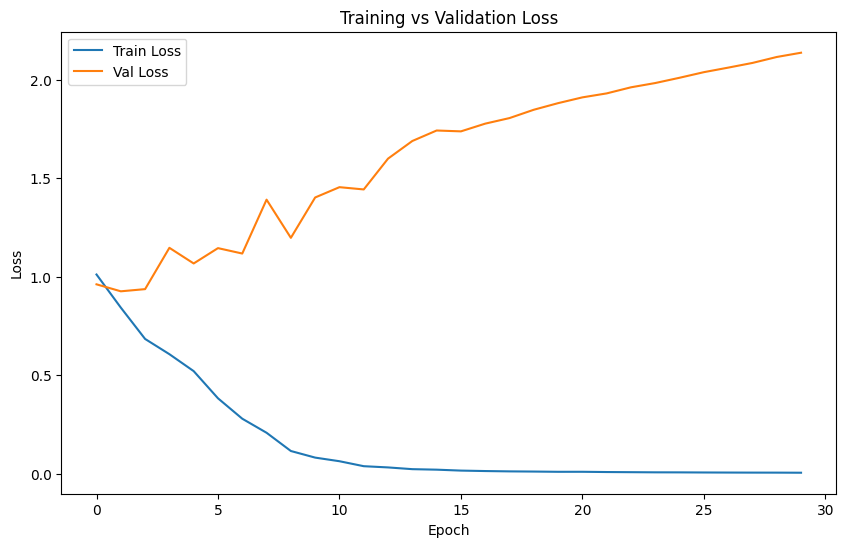

In [81]:
print("\nEvaluating Model 1 (Unidirectional RNN):")
f1_1 = evaluate_model(model_1, x_val, y_val, history_1)

#### Model 2


Evaluating Model 2 (Bidirectional RNN):
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
              precision    recall  f1-score   support

           0       0.74      0.84      0.79        38
           1       0.41      0.50      0.45        24
           2       0.46      0.34      0.39        38

    accuracy                           0.57       100
   macro avg       0.54      0.56      0.55       100
weighted avg       0.56      0.57      0.56       100

Macro F1-score: 0.5456


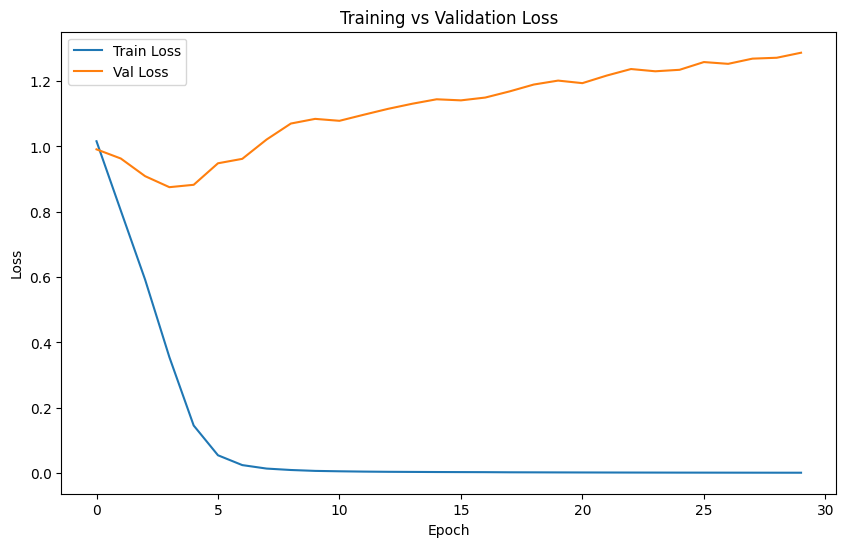

In [82]:
print("\nEvaluating Model 2 (Bidirectional RNN):")
f1_2 = evaluate_model(model_2, x_val, y_val, history_2)

### Validation Loss Comparison

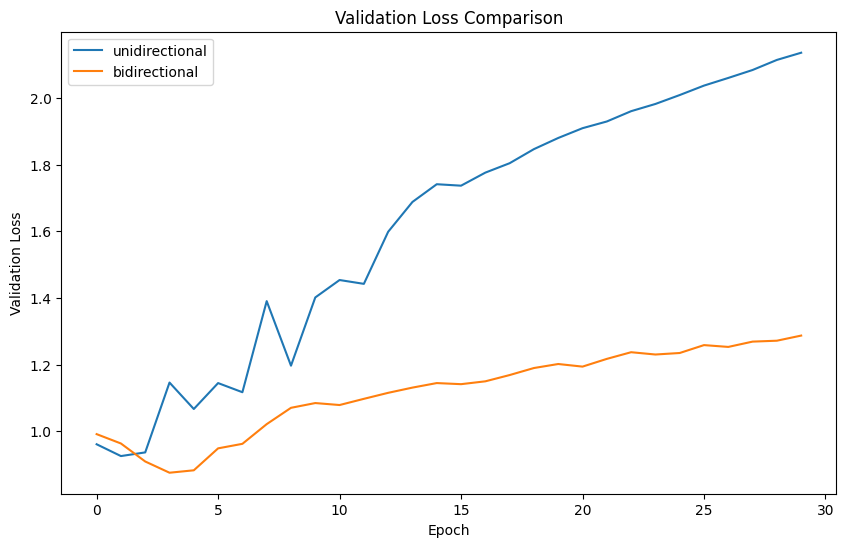

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(history_1.history['val_loss'], label='unidirectional')
plt.plot(history_2.history['val_loss'], label='bidirectional')
plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

### Training Loss Comparison

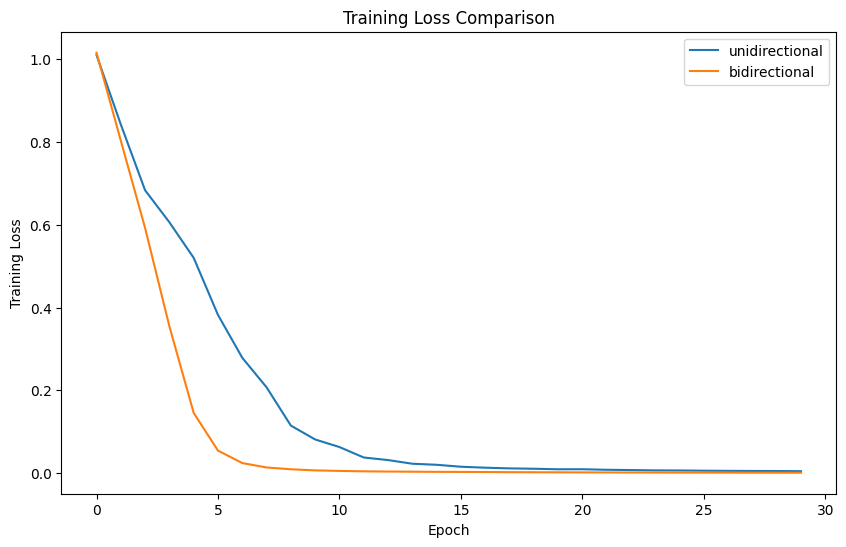

In [84]:
plt.figure(figsize=(10, 6))
plt.plot(history_1.history['loss'], label='unidirectional')
plt.plot(history_2.history['loss'], label='bidirectional')
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

### Accuracy Comparison

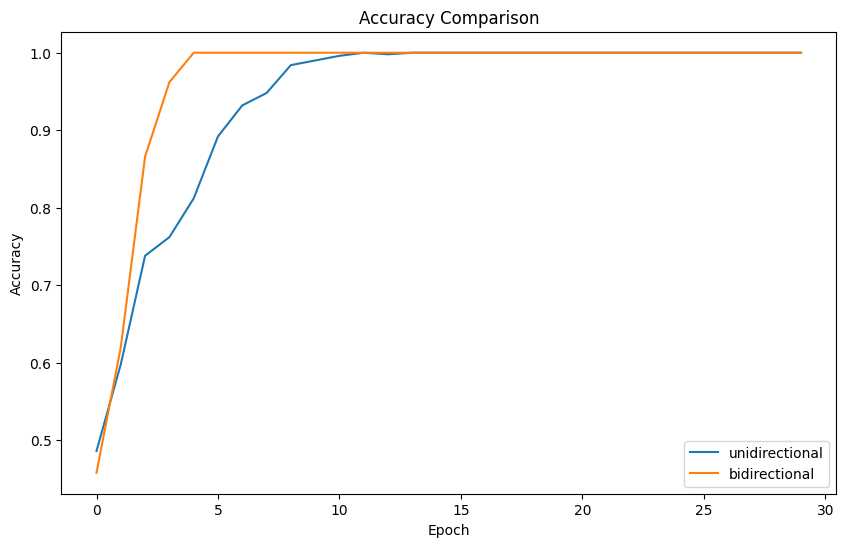

In [85]:
plt.figure(figsize=(10, 6))
plt.plot(history_1.history['accuracy'], label='unidirectional')
plt.plot(history_2.history['accuracy'], label='bidirectional')
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### F1 Score Comparison

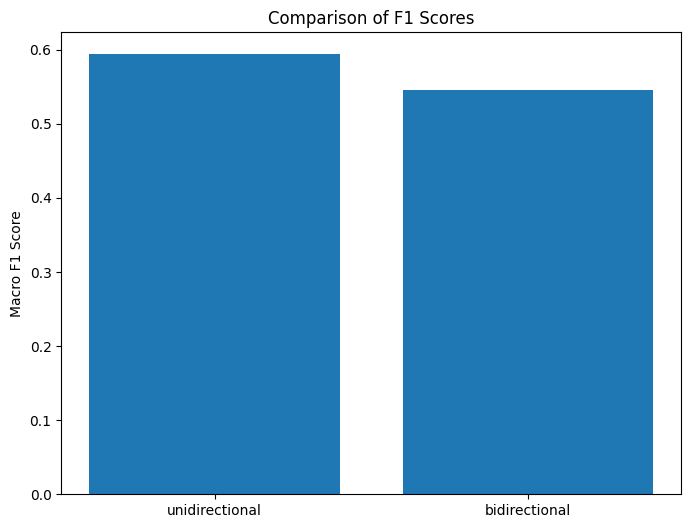

In [86]:
plt.figure(figsize=(8, 6))
plt.bar(['unidirectional', 'bidirectional'], [f1_1, f1_2])
plt.title('Comparison of F1 Scores')
plt.ylabel('Macro F1 Score')
plt.show()